# CASTONE PROJECT 3
## Telco Industries Customer Churn
### Created by : Muchammad Fahd Ishamuddin (DTIDS-0206)

This Project is Part of Purwadhika Bootcamp DTI Data Analyst/Science

## Business Definition and Data Deep Dive

**Context**
A company engaged in telecommunications wants to find customers who subscribe. Many people subscribe to get services from the company. The company wants to know which customers actually subscribe to the services offered with various products. Information related to subscription duration, security, service, and costs.

Target:

0: No Churn

1: Churn

**Problem Statement:**

In the service provider business, it is very vulnerable to the subscription system, and in the business there is a close relationship between customers, where customers can support the needs and life of this telco company.

And if customers are easily reduced, it means that there must be a business model that is changed or marketing that is repeated because it fails to achieve the desired target from the business, besides the business, the existence of churn means that customer service can be labeled bad.

**Goals:**

So based on these problems, the company wants to have the ability to predict the possibility that a customer will/want to stop subscribing or not, so that it can evaluate and analyze this ongoing business.

And also, the company wants to know what/what factors/variables make a customer want to stop subscribing or not, so that they can create a better strategy in approaching potential customers.

**Analytic Approach:**

So what we will do is analyze the data to find patterns that distinguish customers who are still subscribed and those who are not.

Then we will build a classification model that will help the company to be able to predict the probability of customer behavior that still wants to subscribe and those who are not.

**Metric Evaluation**

Type 1 error: False Positive
Consequence: wasted marketing costs, time and resources

Type 2 error: False Negative
Consequence: loss of potential customers

Based on the consequences, then as much as possible what we will do is create a model that can reduce the risk of subscription decline, but without making it a lack/insufficient number of customers who subscribe. So we want as many positive class predictions as possible to be correct, with as few false negative predictions as possible.

### Attribute Information

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| Dependents | Object | Whether the customer has dependents or not |
| Tenure | Num | Number of months the customer has stayed with the company |
| OnlineSecurity | Object | Whether the customer has online security or not |
| OnlineBackup | Object | Whether the customer has online backup or not |
| InternetService | Object | Whether the client is subscribed to Internet service |
| DeviceProtection | Object | Whether the client has device protection or not |
| TechSupport | Object | Whether the client has tech support or not |
| Contract | Object | Type of contract according to duration. |
| PaperlessBilling | Object | Bills issued in paperless form |
| MonthlyCharges | Num | Amount of charge for service on monthly bases |
| Churn | Object | Whether the customer churns or not |


In [1]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
import joblib
# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

"Load the data"

In [2]:
df = pd.read_csv('data_telco_customer_churn.csv')

Explain Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB



- The dataset represents customer profiles who have left the telco company. A churn in telco and other subscription-based services means a situation when the customer leaves the service provider.

In [4]:
len(df)

4930

telco data have len 4930 data

In [5]:
df.describe()

,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


The `tenure` Column have minimum value `0` this not make

In [6]:
df.describe(include='object')

,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
count,4930,4930,4930,4930,4930,4930,4930,4930,4930
unique,2,3,3,3,3,3,3,2,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes,No
freq,3446,2445,2172,2172,2186,2467,2721,2957,3614


From this Describe we found 2 columns are Numerical and 9 are  Categorical, which is this dataset will have many "One Hot Encoding"

In [7]:
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [8]:
df = df[df['tenure']>0]

In [9]:
df.describe()

,tenure,MonthlyCharges
count,4922.000000,4922.000000
mean,32.453881,64.909224
std,24.486218,29.927394
min,1.000000,18.800000
25%,9.000000,38.325000
50%,29.000000,70.350000
75%,56.000000,89.900000
max,72.000000,118.650000


In [10]:
df.MonthlyCharges.unique()

array([ 72.9 ,  82.65,  47.85, ...,  58.45,  23.65, 108.5 ])

In [11]:
df.isnull().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

In [12]:
df.tenure.min()

1

Our data are not empty so to make sure the data distribution we turn to EDA to doing Visualization the Data

### EDA(Exploratory Data Analysis)

Data Visualization

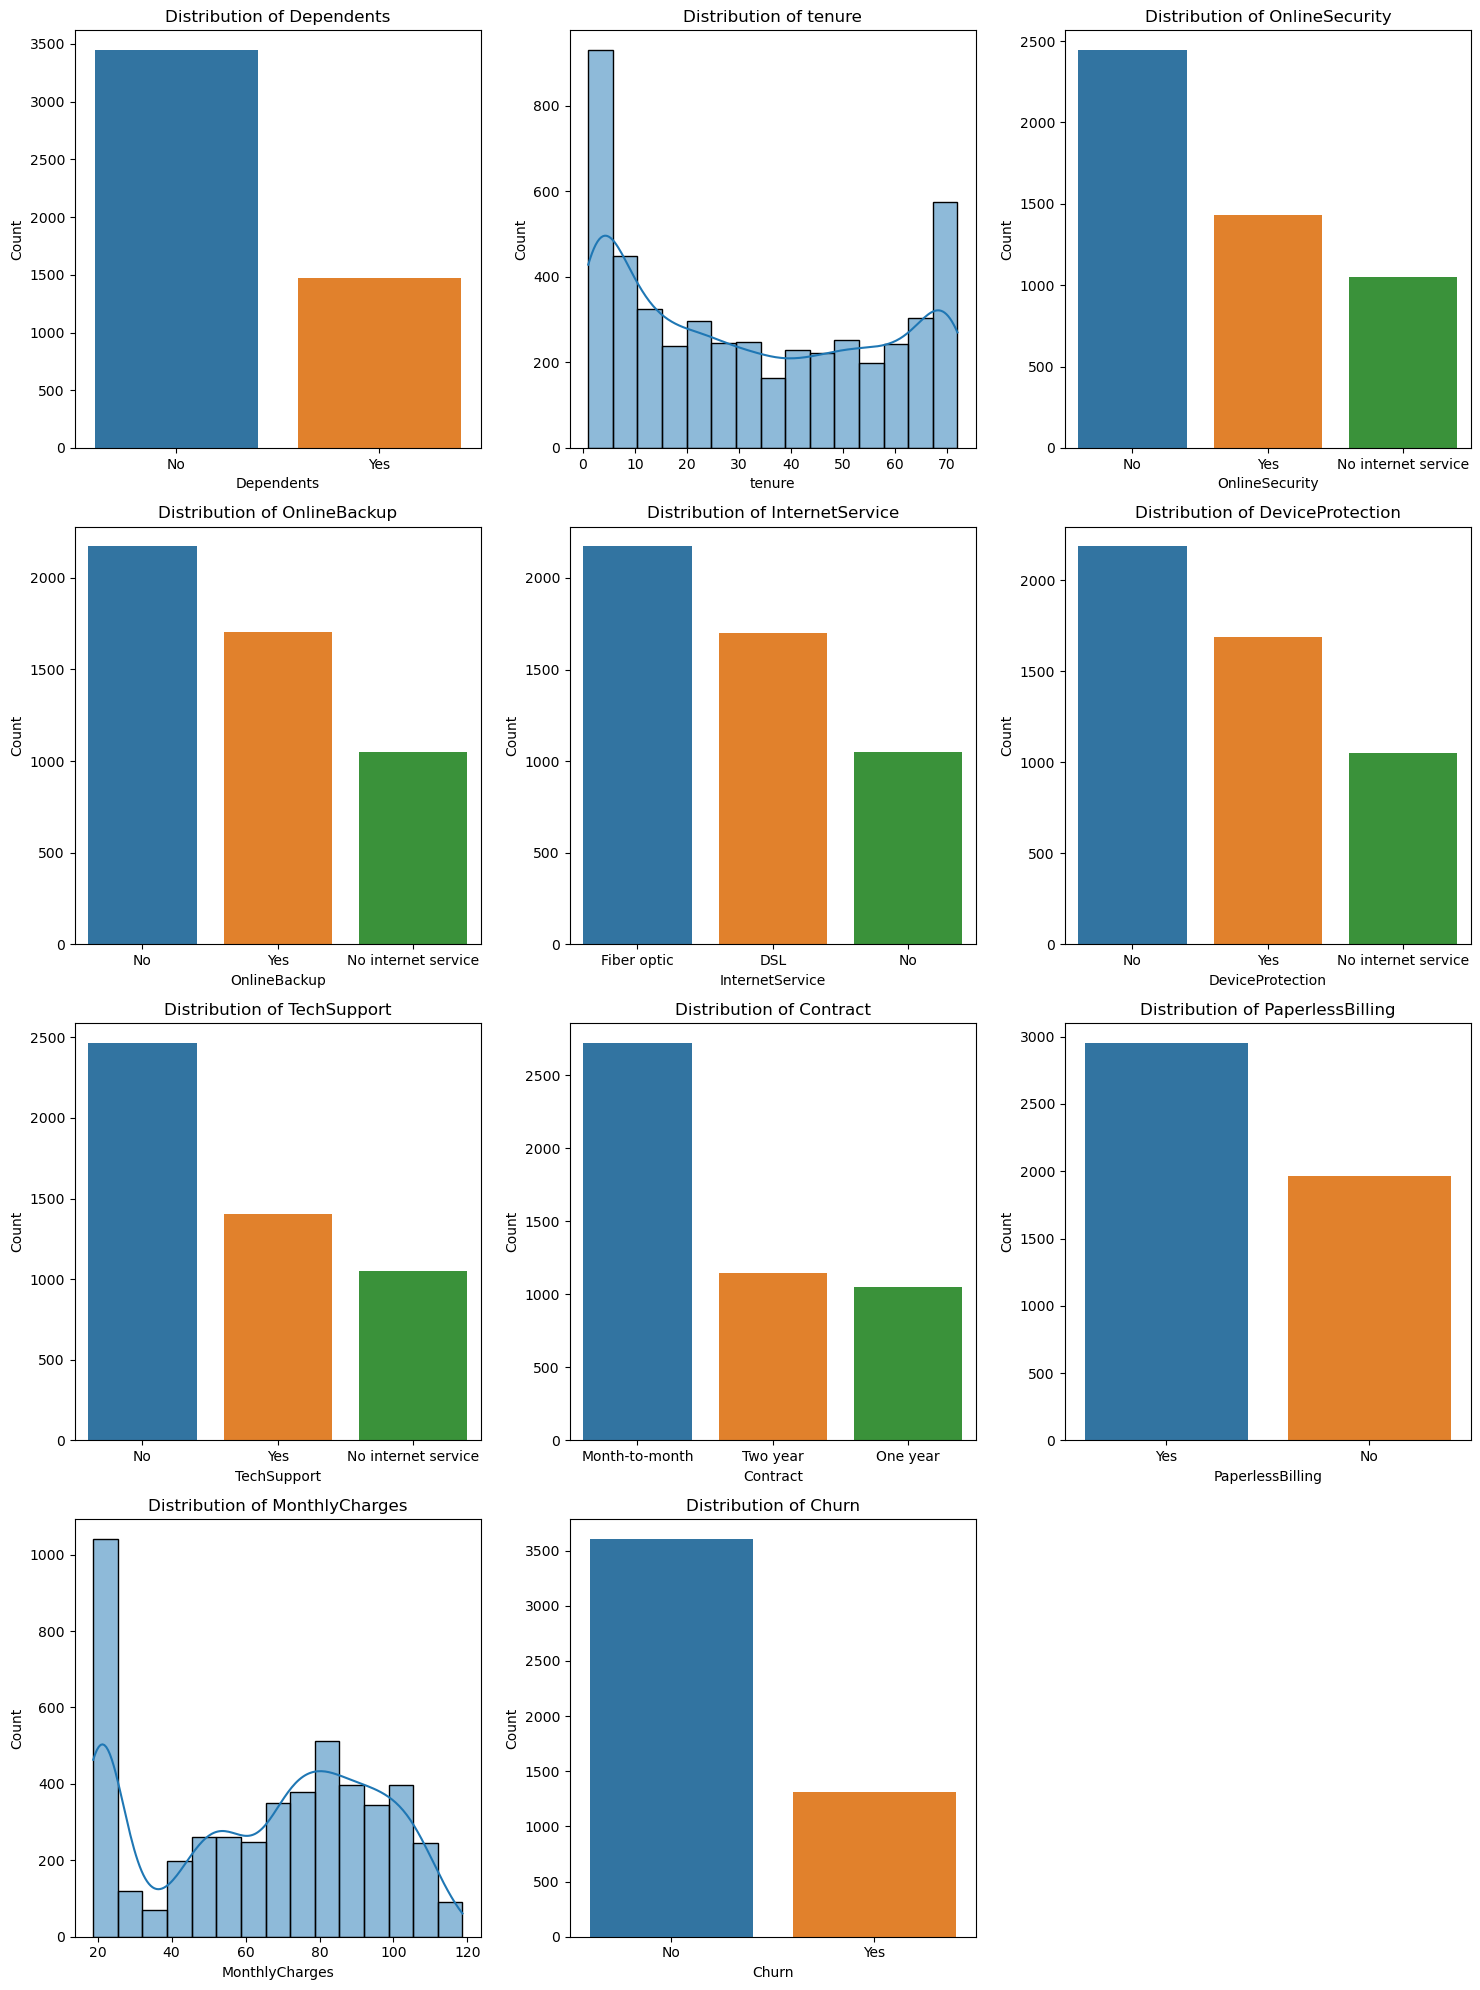

In [13]:
import math
# Set the number of rows and columns for the grid
num_cols = len(df.columns)
rows = math.ceil(num_cols / 3)  # Calculate the required number of rows
cols = 3  # Fixed number of columns

# Create the subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Loop through each column and plot
for i, col in enumerate(df.columns):
    if df[col].dtype in ['int64', 'float64']:  # For numeric data
        sns.histplot(df[col], bins=15, kde=True, ax=axes[i])
    else:  # For categorical data
        # Aggregate counts for the categorical data
        category_counts = df[col].value_counts().reset_index()
        category_counts.columns = [col, 'Count']

        # Use sns.barplot for custom counts
        sns.barplot(x=col, y='Count', data=category_counts, ax=axes[i], palette='tab10')
    axes[i].set_title(f'Distribution of {col}')

# Remove empty subplots if columns < grid size
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Remove unused axes

plt.tight_layout()
plt.show()


In [14]:
no_internet=df[df['InternetService']=='No']
no_internet['OnlineSecurity'].value_counts()

OnlineSecurity
No internet service    1049
Name: count, dtype: int64

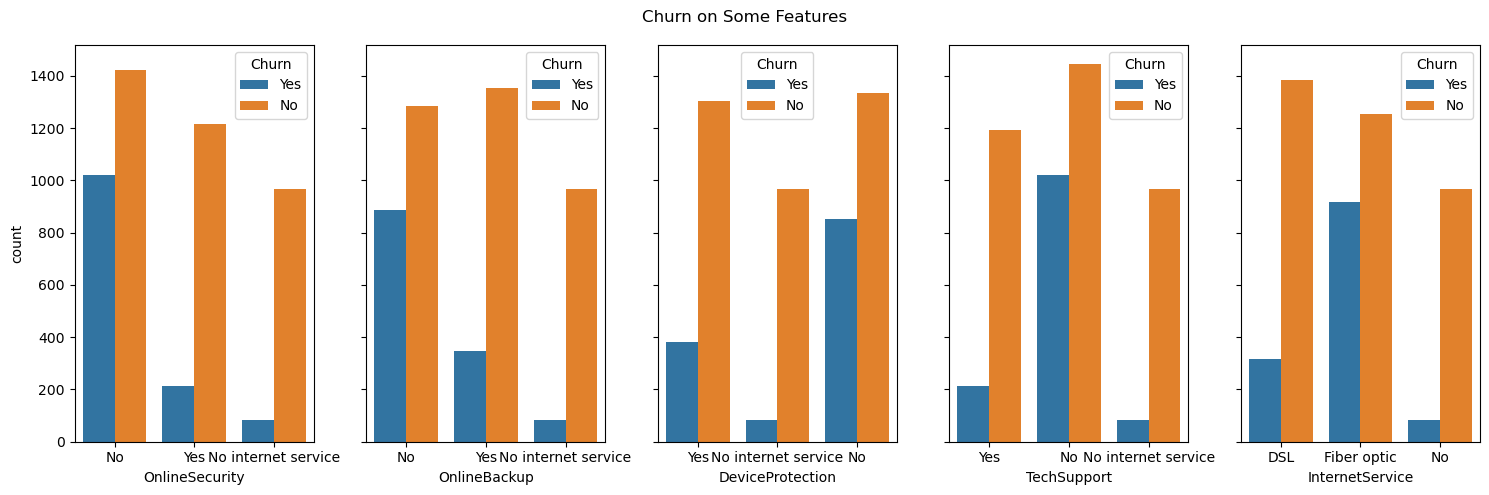

In [15]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True)

# Set the title for the whole figure
plt.suptitle("Churn on Some Features")

# Create the countplots
sns.countplot(x="OnlineSecurity", data=df, hue="Churn", ax=axes[0])
sns.countplot(x="OnlineBackup", data=df, hue="Churn", ax=axes[1])
sns.countplot(x="DeviceProtection", data=df, hue="Churn", ax=axes[2])
sns.countplot(x="TechSupport", data=df, hue="Churn", ax=axes[3])
sns.countplot(x="InternetService", data=df, hue="Churn", ax=axes[4])
# Show the plot
plt.tight_layout()
plt.show()

- decision to churn is based on service, can we see the service without `OnlineSecurity`, `OnlineBackup`, `Device Protection` and `Tech support` are highly to churn. 
- The customer who didnt have `internet service` maybe they want service from TV or Phone from telco Companies

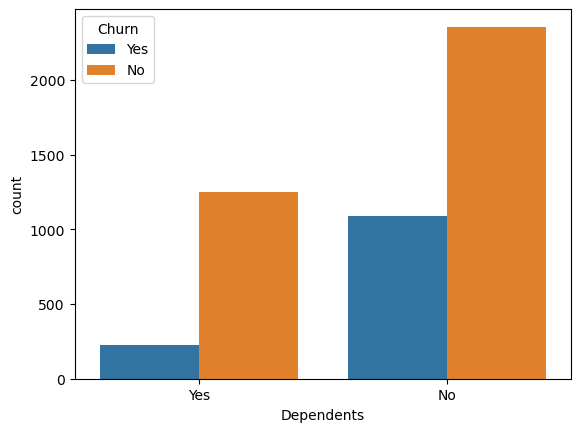

In [16]:
sns.countplot(x="Dependents", data=df, hue="Churn")
plt.show()

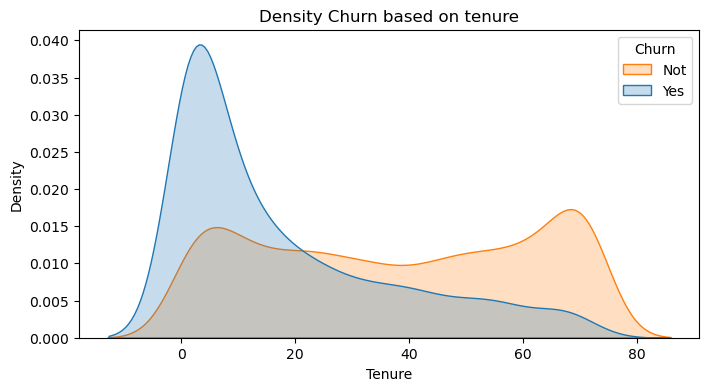

In [17]:
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df, x="tenure", hue="Churn", common_norm=False, fill=True)
plt.title("Density Churn based on tenure")
plt.xlabel("Tenure")
plt.ylabel("Density")
plt.legend(title="Churn", labels=["Not", "Yes"])
plt.show()

The early customer is the most churn, can we see the loyal customer rare doing churn

In [18]:
df.MonthlyCharges.min()

18.8

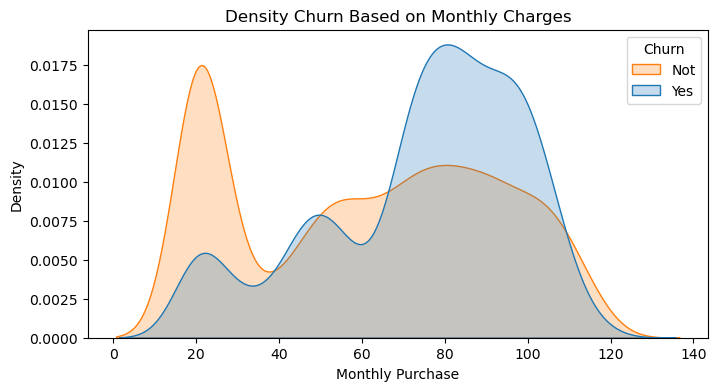

In [19]:
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", common_norm=False, fill=True)
plt.title("Density Churn Based on Monthly Charges")
plt.xlabel("Monthly Purchase")
plt.ylabel("Density")
plt.legend(title="Churn", labels=["Not", "Yes"])

The price is the most factor to doing churn, more higher monthly charge more often customer decide to churn

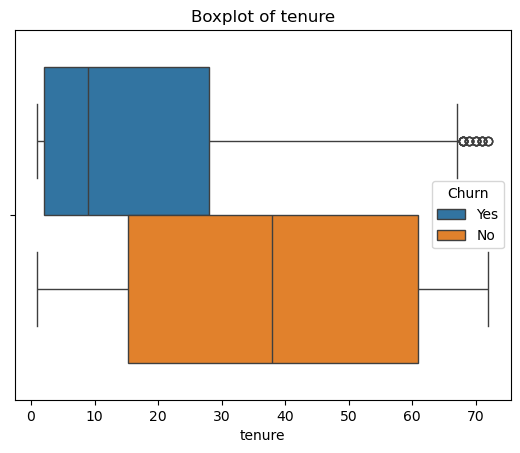

In [20]:
sns.boxplot(x='tenure', data=df,hue='Churn', palette='tab10')
plt.title('Boxplot of tenure')
plt.show()

Median of tenure is below 30

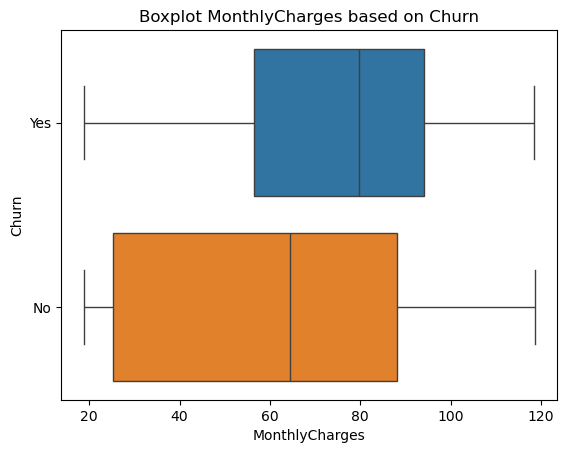

In [21]:
sns.boxplot(x='MonthlyCharges', y='Churn', data=df, palette='tab10')
plt.title('Boxplot MonthlyCharges based on Churn')
plt.show()

In [22]:
# pip install dython

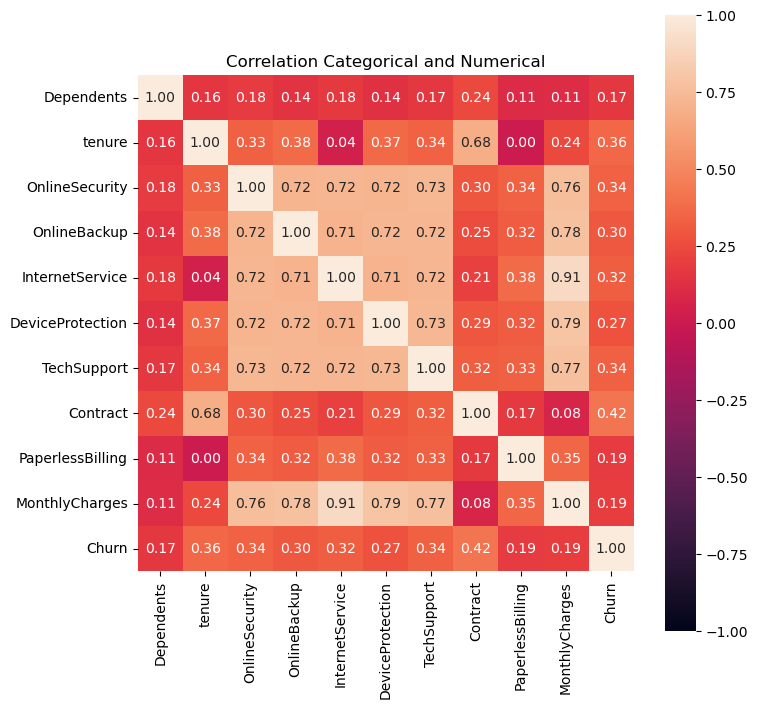

In [23]:
from dython.nominal import associations
complete_correlation = associations(
    df,
    cmap='rocket',
    title='Correlation Categorical and Numerical',
    figsize=(8,8),
    annot=True
)

correlation_matrix = complete_correlation['corr']
plt.show()

## Data PreProcessing

### Data Cleaning

In [24]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Dependents,object,0,0.0,2,"[Yes, No]"
1,tenure,int64,0,0.0,72,"[12, 14]"
2,OnlineSecurity,object,0,0.0,3,"[No internet service, Yes]"
3,OnlineBackup,object,0,0.0,3,"[Yes, No]"
4,InternetService,object,0,0.0,3,"[Fiber optic, DSL]"
5,DeviceProtection,object,0,0.0,3,"[Yes, No internet service]"
6,TechSupport,object,0,0.0,3,"[No, Yes]"
7,Contract,object,0,0.0,3,"[Two year, One year]"
8,PaperlessBilling,object,0,0.0,2,"[No, Yes]"
9,MonthlyCharges,float64,0,0.0,1421,"[97.85, 18.85]"


No Outlier, No Missing data so not to much to cleaningg the data

### Feature Engineering

## Declaration Model

In [25]:
target = 'Churn'  # Ubah sesuai nama kolom target
X = df.drop(columns=[target])
y = df[target]

In [26]:
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [27]:
# Pilihan untuk mengisi nilai kosong
X[numerical_cols] = X[numerical_cols].fillna(X[numerical_cols].mean())
X[categorical_cols] = X[categorical_cols].fillna('Unknown')


In [28]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Pipeline preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])


In [29]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['tenure', 'MonthlyCharges'], dtype='object')),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object'))])

### Splitting Data

## Training Model

In [30]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
testing = pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
print(testing.head())

# Baseline model (dummy classifier)
baseline_model = DummyClassifier(strategy='most_frequent')
baseline_model.fit(X_train, y_train)
baseline_predictions = baseline_model.predict(X_test)

# Evaluasi baseline
baseline_accuracy = accuracy_score(y_test, baseline_predictions)
print("Baseline Accuracy:", baseline_accuracy)


   num__tenure  num__MonthlyCharges  cat__Dependents_No  cat__Dependents_Yes  \
0     0.341909             0.322739                 0.0                  1.0   
1    -0.634142            -1.498827                 1.0                  0.0   
2    -0.430798             0.082312                 0.0                  1.0   
3    -0.674810             1.600006                 0.0                  1.0   
4    -0.512135            -1.523872                 1.0                  0.0   

   cat__OnlineSecurity_No  cat__OnlineSecurity_No internet service  \
0                     0.0                                      0.0   
1                     0.0                                      1.0   
2                     0.0                                      0.0   
3                     0.0                                      0.0   
4                     0.0                                      1.0   

   cat__OnlineSecurity_Yes  cat__OnlineBackup_No  \
0                      1.0                   1

In [31]:
testing = pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
testing.head()

,num__tenure,num__MonthlyCharges,cat__Dependents_No,cat__Dependents_Yes,cat__OnlineSecurity_No,cat__OnlineSecurity_No internet service,cat__OnlineSecurity_Yes,cat__OnlineBackup_No,cat__OnlineBackup_No internet service,cat__OnlineBackup_Yes,cat__InternetService_DSL,cat__InternetService_Fiber optic,cat__InternetService_No,cat__DeviceProtection_No,cat__DeviceProtection_No internet service,cat__DeviceProtection_Yes,cat__TechSupport_No,cat__TechSupport_No internet service,cat__TechSupport_Yes,cat__Contract_Month-to-month,cat__Contract_One year,cat__Contract_Two year,cat__PaperlessBilling_No,cat__PaperlessBilling_Yes
0,0.341909,0.322739,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,-0.634142,-1.498827,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.430798,0.082312,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,-0.674810,1.600006,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,-0.512135,-1.523872,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = {
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {'classifier__n_estimators': [100, 200], 'classifier__max_depth': [10, 20, None]}
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {'classifier__C': [0.1, 1, 10]}
    },
    'SVM': {
        'model': SVC(),
        'params': {'classifier__C': [0.1, 1, 10], 'classifier__kernel': ['linear', 'rbf']}
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {'classifier__max_depth': [None, 10, 20]}
    }
}
# xgboost
# adaboost
# KNN


In [33]:
# k fold
# hyper param

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Dictionary untuk menyimpan hasil
benchmark_results = {}

for name, model in models.items():
    # Buat pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model['model'])
    ])
    
    # GridSearchCV
    grid_search = GridSearchCV(
        pipeline,
        model['params'],
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    
    # Simpan hasil terbaik
    benchmark_results[name] = {
        'best_params': grid_search.best_params_,
        'best_estimator': grid_search.best_estimator_,
        'accuracy': grid_search.best_score_
    }

# Ambil model terbaik
best_model_name = max(benchmark_results, key=lambda x: benchmark_results[x]['accuracy'])
best_model_pipeline = benchmark_results[best_model_name]['best_estimator']

print(best_model_name)
# Simpan model terbaik ke file
import joblib
joblib.dump(best_model_pipeline, 'best_model_pipeline.pkl')


SVM


['best_model_pipeline.pkl']

In [35]:
benchmark_results

{'RandomForest': {'best_params': {'classifier__max_depth': 10,
   'classifier__n_estimators': 100},
  'best_estimator': Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('num', StandardScaler(),
                                                    Index(['tenure', 'MonthlyCharges'], dtype='object')),
                                                   ('cat',
                                                    OneHotEncoder(handle_unknown='ignore'),
                                                    Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
         'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
        dtype='object'))])),
                  ('classifier', RandomForestClassifier(max_depth=10))]),
  'accuracy': 0.7889276246621817},
 'LogisticRegression': {'best_params': {'classifier__C': 0.1},
  'best_estimator': Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('num

In [36]:
print(best_model_pipeline)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['tenure', 'MonthlyCharges'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object'))])),
                ('classifier', SVC(C=1))])


- optimize (probability optimisation)
- precisioin recall curve
- Feature selection
- ROC-AUC
- Feature Importance
- Shape value
- conclusion
- recomendation

In [37]:
# Load the saved model
loaded_model = joblib.load('best_model_pipeline.pkl')

# Contoh data input
example_input = {
    'Dependents': 'Yes',
    'tenure': 10,
    'OnlineSecurity': 'No',
    'OnlineBackup': 'No',
    'InternetService': 'DSL',
    'DeviceProtection': 'Yes',
    'TechSupport': 'Yes',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'MonthlyCharges': 72.9
}

# Konversi input ke DataFrame
example_df = pd.DataFrame([example_input])

# Prediksi
prediction = loaded_model.predict(example_df)
print("Prediction:", prediction)


Prediction: ['No']


## Evaluation

## Optimation and Tuning

### Hyperparameter Tuning

### Feature Selection

## Deployment

### Export Model (PKL)